CS530 Homework 13 



#### Question 1 (3.5 points)

**Complete this question on your own and submit it individually.** 



In this question we ask you to implmenet the backprop algorithm by hand, on paper. This will help you grasp the various details and intricacies associated with this algorithm.

To make the problem simple, say that you have a dataset with just 2 samples, $\vec x_1=[2,3,4]$, $\vec x_2=[6,8,3]$, and their corresponding output variables, $y_1=10$ and $y_2=15$. You plan to train the neural network with the architecture below on this dataset. The weights $\overleftrightarrow W_1$ and $\overleftrightarrow W_2$ are initialized with the values below.

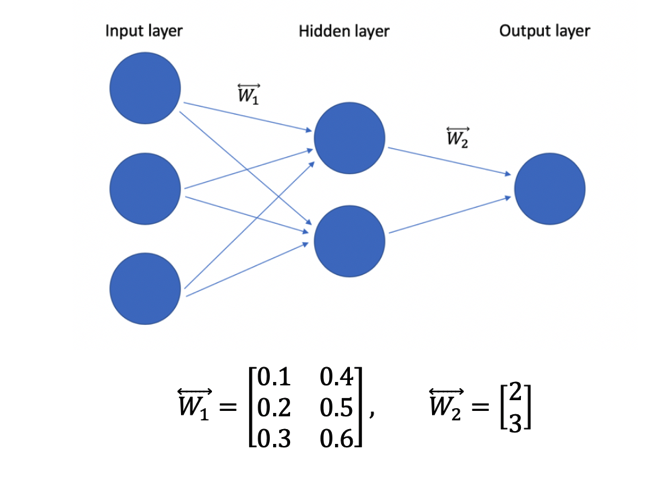

In [ ]:
from IPython.display import Image
Image("Screen Shot 2021-04-26 at 2.33.41 PM.png")

As you work through the backprop, note the following:
- You need not include the bias terms. 
- Use $0.1$ as the learning rate. 
- Use the sigmoid function, $$f(x)=\frac{1}{1+e^{-x}},$$ as the activation function for the hidden layer and the linear function for the output layer.

Calculate the weight updates for $\overleftrightarrow W_1$ and $\overleftrightarrow W_2$ using the backprop and update the weights for the first iteration (or epoch) over the dataset using the backpropagation algorithm under stochastic gradient descent with a batch size of 1. You can round all your results to two decimal places. Show all your work on a piece of paper and upload a picture of your work.

In [96]:
from PIL import Image

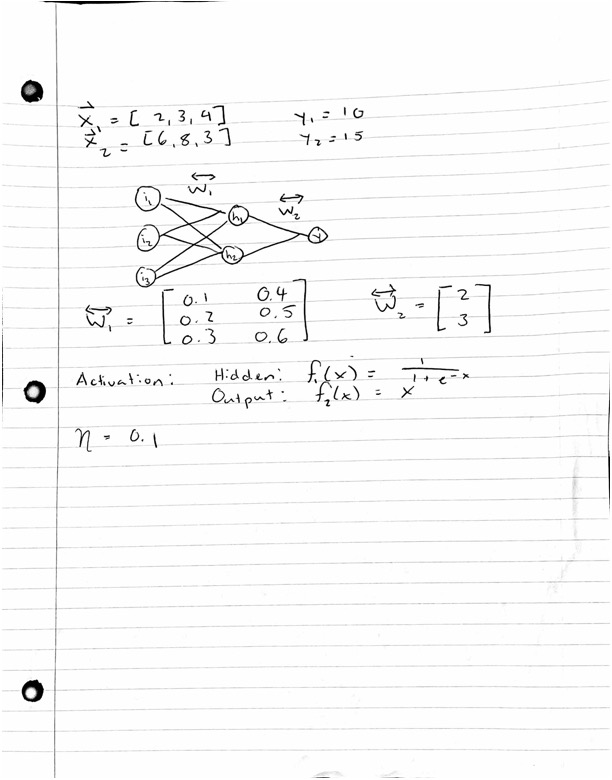

In [100]:
Question1_1 = Image.open('Question1_1.jpg')
Question1_1

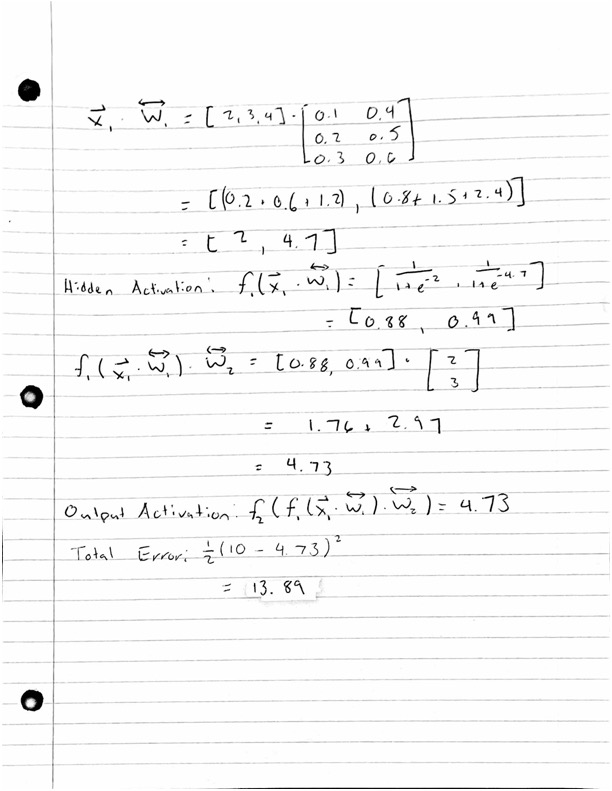

In [99]:
Question1_2 = Image.open('Question1_2.jpg')
Question1_2

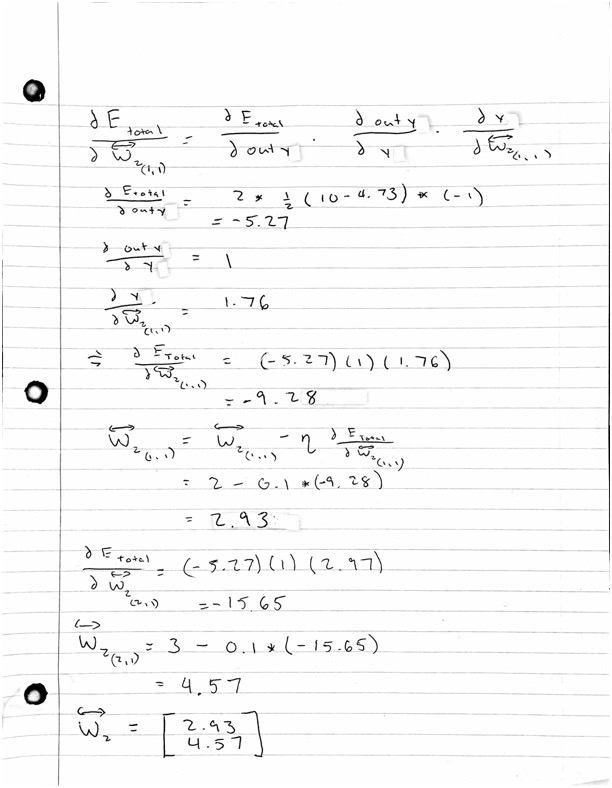

In [101]:
Question1_3 = Image.open('Question1_3.jpg')
Question1_3

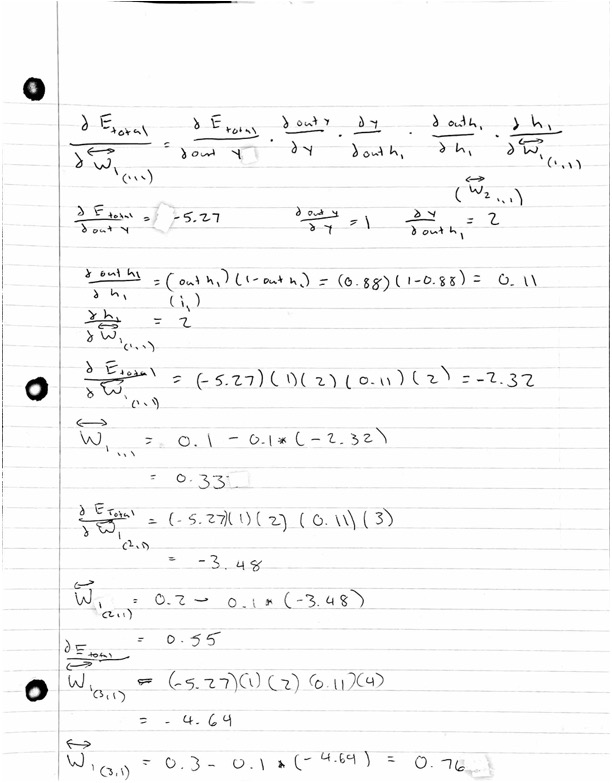

In [103]:
Question1_4 = Image.open('Question1_4.jpg')
Question1_4

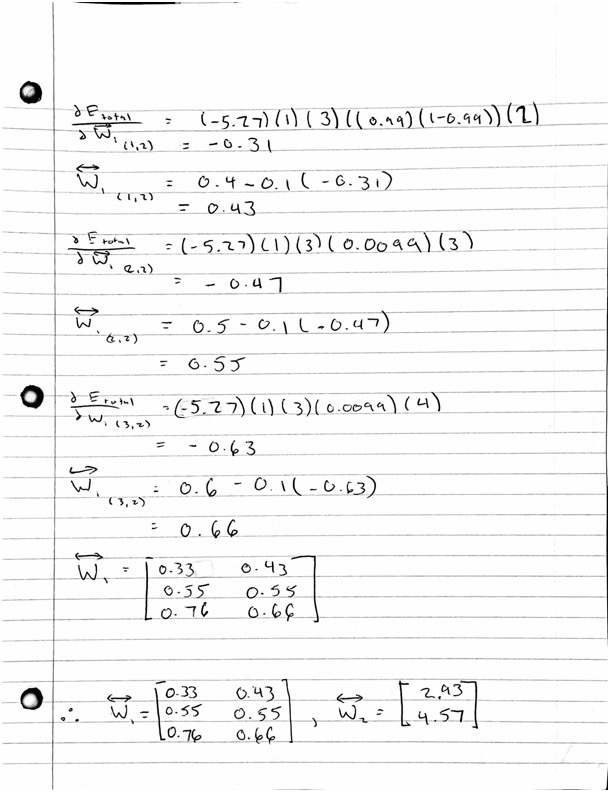

In [102]:
Question1_5 = Image.open('Question1_5.jpg')
Question1_5

#### Question 2 (3.5 points)

**Complete this question on your own and submit it individually.** 

The driving engine behind the success of much of computer vision in recent years has been convolutional neural networks (also CNNs or conv nets). As you learned in class, those models are especially appropriate to classify or regress on images, videos, and other high dimensional data, where much of the classification or regression depends on local and relatively invarient structure in the input (among other characteristics). 

In this question, you will classify the MNIST digits while relying on the following architectures: 

a. CNN 

b. FCNN

c. Autoencoder

Remember that Python and other documentation is your friend for this question.  

In [93]:
import sys
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam

##### Part a

a. Implement a small CNN on the MNIST dataset to classify the handwritten digits. We leave the implementation details—including the exact structure of the architecture—to you. However, you should vary the parameters below and report what each of the changes means for the performance of the model. Also, report the accuracy of your final model. Why do you think that model worked better than other models you tried?

Parameters to vary: 

- batch size
- number of layers 
- max-pooling
- activation functions 
- number of epochs
- dropout rate (we will discuss this further next class)
- optimizer 
- loss function

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Base Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 98.690

> 98.690


###### Parameter Variations

In [ ]:
# Increased Batch Size
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 98.700

> 98.700


In [ ]:
# Additional Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 98.900

> 98.900


In [ ]:
# Additional CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 98.920

> 98.920


In [ ]:
# Additional Max-Pooling
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 98.720

> 98.720


In [ ]:
# Activation Function
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 96.840

> 96.840


In [ ]:
# Number of Epochs
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 98.750

> 98.750


In [ ]:
# Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 98.870

> 98.870


In [ ]:
# Optimizer
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 10.100

> 10.100


###### Final Model

In [ ]:
# Final Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 99.250  - 10 min

> 99.250


Final model accuracy: 99.250

Parameter Variation:
- batch size: An increase in batch size can lead to a better accuracy. However, runtime will increase and the generalizability of the model can suffer if the batch size is too large.
- number of layers: More layers leads to a better accuracy, however, runtime can become siginicantly longer. In addition, using too many layers can lead to overfitting.
- cnn: Adding an additional CNN led to an increase in accuracy due to the fact that the neighboring pixels are very informative in classifying a particular digit. However, runtime increases substanitally in doing so.
- max-pooling: Increasing the amount of max-pooling can make the model more generalizable. Too much can hurt accuracy however.
- activation functions: Using different activation functions can lead to differences in performance. In this case sigmoid appears to perform better than relu.
- number of epochs: By increasing the number of epochs, the model will run over the training set more times. Thus too large of an epoch can lead to overfitting.
- dropout rate: Dropout can help against overfitting by removing connections between nodes randomly.
- optimizer: The optimizer helps determine how to train the model and how the model learns. Adam was tested and in this case SGD performed better.
- loss function: The loss function is used to determine error in our model. In this case, since there are 10 classes and we are trying to label accordingly, categorical_crossentropy was used.

##### Part b

b. Now re-classify the MNIST dataset images using a fully connected neural network (FCNN). We again leave the implementation details of the network to you. But you should vary all the relevant parameters above (i.e., those that pertain to FCNN) and compare the accuracy of the best FCNN to that of the CNN you implemented above. Explain the result that you get. Why do you think that the CNN does better / roughly the same / worse than the FCNN?

In [94]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Base Model
model = Sequential()
model.add(Dense(10,activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 92.510

> 92.510


###### Parameter Variations

In [ ]:
# Increased Batch Size
model = Sequential()
model.add(Dense(10,activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 92.240

> 92.240


In [ ]:
# Added Dense
model = Sequential()
model.add(Dense(397, activation='relu',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 

> 98.020


In [ ]:
# Activation Function
model = Sequential()
model.add(Dense(397, activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 95.980

> 95.980


In [ ]:
# Increased Epochs
model = Sequential()
model.add(Dense(10,activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 92.560

> 92.560


In [ ]:
# Dropout
model = Sequential()
model.add(Dense(397, activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 98.170

> 98.170


In [ ]:
# Optimizer
model = Sequential()
model.add(Dense(10,activation='softmax'))

opt = Adam(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
# 89.420

> 89.420


###### Final Model

In [ ]:
# Final Model
model = Sequential()
model.add(Dense(595, activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(397,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(198,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

# 98.420 - 2 min

> 98.420


Final Model Accuracy: 98.420

Discussion:
The reason that CNN does better here is due to the fact that the individual pixels are related to each other. A FCNN will learn this fact eventually, but it will require more samples and more time to do so. Meanwhile, since CNN has already been given that this is true, it is able to make further computations on what features are the most important in classifying digits. However, it should be noted that the FCNN was able to finish running at around 2 minutes compared to the CNN which ran for 10 min.

##### Part c

c. Last, implement a simple autoencoder that would be trained using the MNIST dataset. Once again the implementation details of the architecture are left to you. After training your encoder, plot some of the original digits and next to them some of the reconstructed digits from your autoencoder. We once more leave the details of the architecture to you. 


In [ ]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose = 0)

In [ ]:
decoded_imgs = autoencoder.predict(X_test)

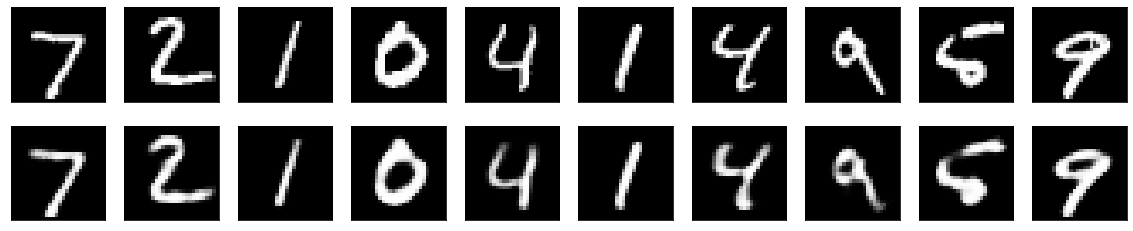

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Question 3 (3 points)

**Complete question 3 in your final-project group.**  Only one person needs to submit the answers to the following by providing a colab link with the following code snipets/information. Make sure to include the names of all the people in your group with your submission. 

At this point,  you should have tried several models, either different classifiers/regressors and different parameters/hyperparameters for those models.  It is now time to report your results.  
Submit the following : 
$ $
* A draft of your Results section for your final project describing the models that you tested in your analysis and their results.
    - This section was briefly described in homework 11 but should now include conclusions drawn from your analysis and an explanation of how you chose the best model. Include important metrics ($R^2$, ROC, accuracy, AUC, ...), data visualizations, and what your results mean for your problem or method of solving your problem.   (250 words max for this draft)
    - You should also include some visualizations.  Be sure to describe the significance that your figures holds and how this relates to your analysis and conclusions.  



Colab Notebook: https://colab.research.google.com/drive/1gMENUbUVgwKUP0vke4RLxUHL2TrOXa64?usp=sharing

Google Doc: https://docs.google.com/document/d/1Cs6r4s0NoQNgLd6vUU2La4H5vu6-zGp0XLFflO9oX_Q/edit?usp=sharing